In [2]:
import numpy as np
import random
from scipy.optimize import minimize

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [42]:
class f_spherical():

    def f(x):
        return x[0]**2 + x[1]**2

    def get_min():
        return 0.0

    def grad(x):
        return 2 * x

class f_condition():

    def f(x):
        return x[0]**2 + 1000 * x[1]**2

    def get_min():
        return 0.0

    def grad(x):
        return np.array([2 * x[0], 2000 * x[1]])

class f_noised():

    def __init__(self, inner):
      self.inner = inner

    def f(self, x):
        return self.inner.f(x) + random.random()

    def get_min(self):
        return self.inner.get_min()

    def grad(self, x):
        true_value = np.array([2 * x[0], 2000 * x[1]])
        return true_value + 0.1 * np.linalg.norm(true_value) * np.random.rand(2)

f_spherical_noised = f_noised(f_spherical)

class f_rosenbrock():

    def f(x):
        return ((1 - x[0])**2) + (100 * (x[1] - (x[0]**2))**2)

    def get_min():
        return f_rosenbrock.f([1, 100**2])

    def grad(x):
        grad = np.zeros_like(x)
        grad[0] = -2 * (1 - x[0]) - 4 * 100 * (x[1] - x[0]**2) * x[0]
        grad[1] = 2 * 100 * (x[1] - x[0]**2)
        return grad


class f_himmelblau():

    def f(x):
        return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

    def get_min():
        return 0.0

    def grad(x):
        grad = np.zeros_like(x)
        grad[0] = 2 * (x[0]**2 + x[1] - 11) * (2 * x[0]) + 2 * (x[0] + x[1]**2 - 7)
        grad[1] = 2 * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1] **2 - 7) * (2 * x[1])
        return grad


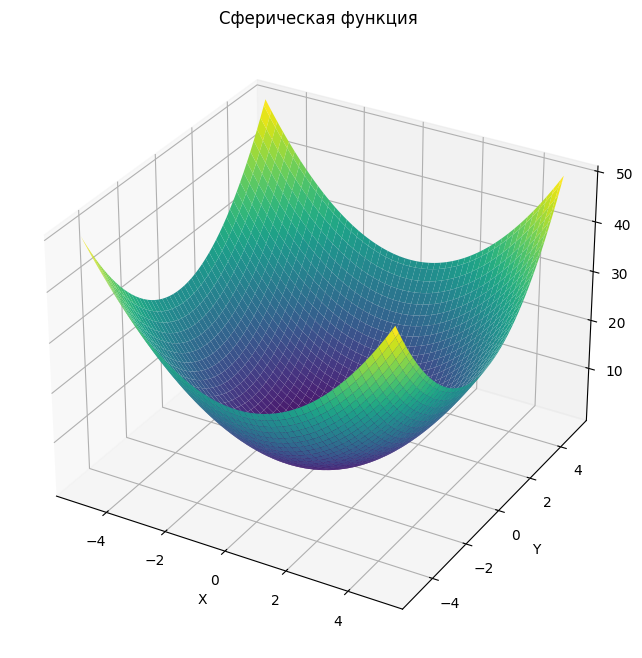

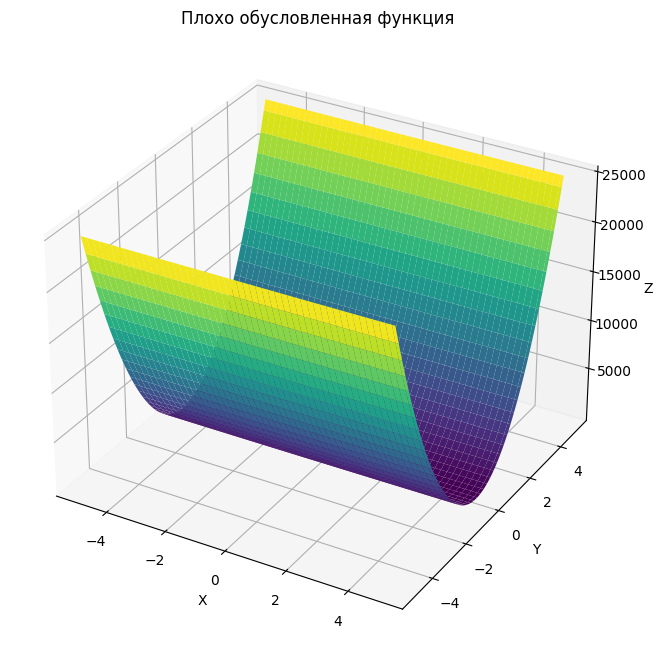

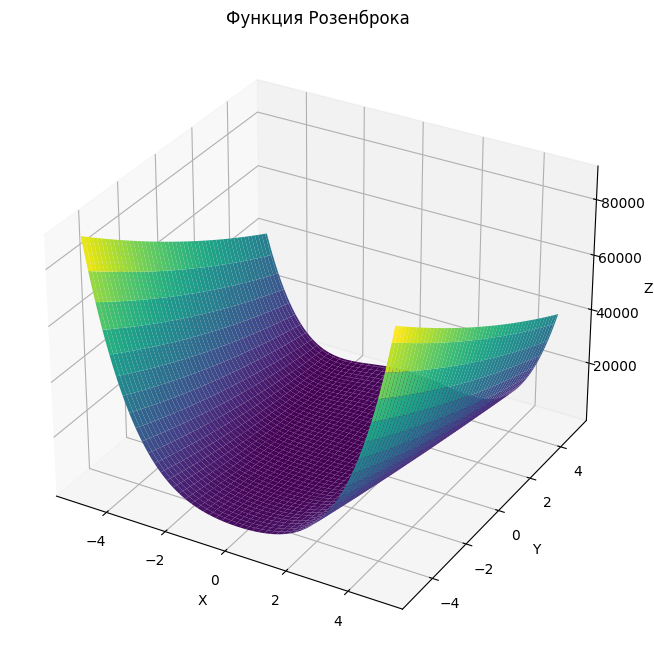

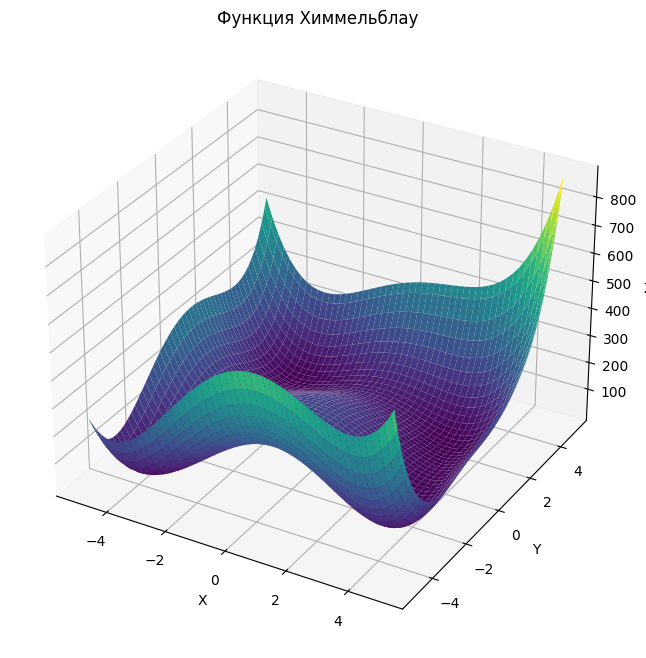

In [4]:
# Создание сетки точек для отображения функций
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

def visualize(f, name):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, f.f([X, Y]), cmap='viridis')
  ax.set_title(name)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  plt.show()

visualize(f_spherical, 'Сферическая функция')
visualize(f_condition, 'Плохо обусловленная функция')
visualize(f_rosenbrock, 'Функция Розенброка')
visualize(f_himmelblau, 'Функция Химмельблау')

In [5]:
import numpy as np

def grad_step(f, lr_func, num_iter = 1000, curr_x = None, tol = 1e-18):

    if curr_x is None:
        curr_x = np.random.random(2)

    history = []

    for iter in range(0, num_iter):
        history.append(np.around(curr_x, 5))
        grad = f.grad(curr_x)
        lr = lr_func(f.f, curr_x, -grad)
        if np.linalg.norm(lr * grad) < tol:
            return iter, history, curr_x
        curr_x -= lr * grad

    return num_iter, history, np.array(curr_x)

def fixed_search(f, x, d, tol = None):
    return 0.001

def dichotomy_search(f, x, d, tol=1e-6):
    a, b = -1, 1

    while abs(b - a) > tol:
        c = (a + b) / 2
        x1, x2 = x + (c - tol) * d, x + (c + tol) * d
        f1, f2 = f(x1), f(x2)

        if f1 < f2:
            b = c
        else:
            a = c

    return (a + b) / 2

def golden_section_search(f, x, d, tol=1e-6):
    a, b = 0, 1
    rho = (np.sqrt(5) - 1) / 2

    while abs(b - a) > tol:
        x1 = a + (1 - rho) * (b - a)
        x2 = a + rho * (b - a)

        f1 = f(x + x1 * d)
        f2 = f(x + x2 * d)

        if f1 < f2:
            b = x2
        else:
            a = x1

    return (a + b) / 2

def Nelder_Mead_search(f, curr_x, num_iter = 1000):
    history = []
    def callback_func(x):
        history.append(np.around(x, 5))
    res = minimize(f.f, curr_x, method='Nelder-Mead', options={'disp': True, 'maxiter' : num_iter}, callback=callback_func)
    return res.nit, history, res.x


def grad_descent_2d(f, num_iter=1000, x0=None, type = "fixed", tol = 1e-6):

    x0 = x0 if x0 is not None else np.random.random(2)

    if type == "fixed":
        return grad_step(f, fixed_search, curr_x = x0, num_iter = num_iter, tol = tol)
    elif type == "golden_section":
        return grad_step(f, golden_section_search, curr_x = x0, num_iter = num_iter, tol = tol)
    elif type == "dichotomy":
        return grad_step(f, dichotomy_search, curr_x = x0, num_iter = num_iter, tol = tol)
    elif type == "Nelder-Mead":
        return Nelder_Mead_search(f, curr_x = x0, num_iter = num_iter)
    return None, None, None

In [49]:
import matplotlib.pyplot as plt

def grad_plot_2d(f, num_iter=1000, x0=np.array([5.03294912, 5.11885609]), type = "fixed", tol = 1e-8):

    history = []
    iter, history, curr_x = grad_descent_2d(f, num_iter, x0, type = type, tol = tol)
    history = np.array(history)
    x = np.linspace(-6, 6, 100)
    y = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x, y)
    Z = f.f(np.array([X, Y]))
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
    ax.plot(history[:, 0], history[:, 1], marker='o', color='red', markersize=3, label='Gradient Descent Path')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gradient Descent: ' + type +", iterations: " + str(iter) + ", min: " + str(history[-1]) + " " + str(round(f.f(curr_x), 5)))
    ax.legend()

def analyze(f, x0, tol):
    grad_plot_2d(f, x0 = np.array(x0), type = "fixed", tol = tol)
    grad_plot_2d(f, x0 = np.array(x0), type = "golden_section", tol = tol)
    grad_plot_2d(f, x0 = np.array(x0), type = "dichotomy", tol = tol)
    grad_plot_2d(f, x0 = np.array(x0), type = "Nelder-Mead", tol = tol)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 70


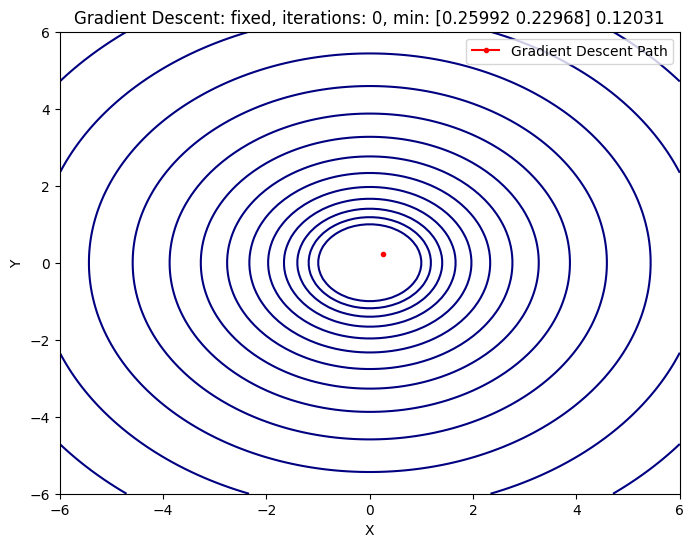

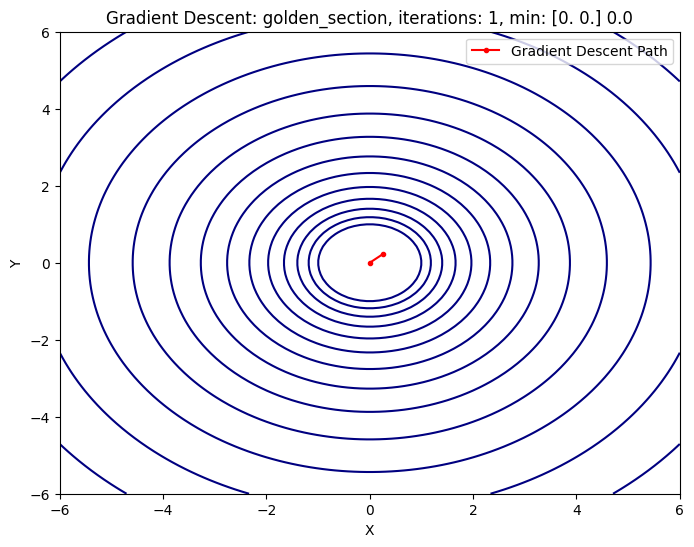

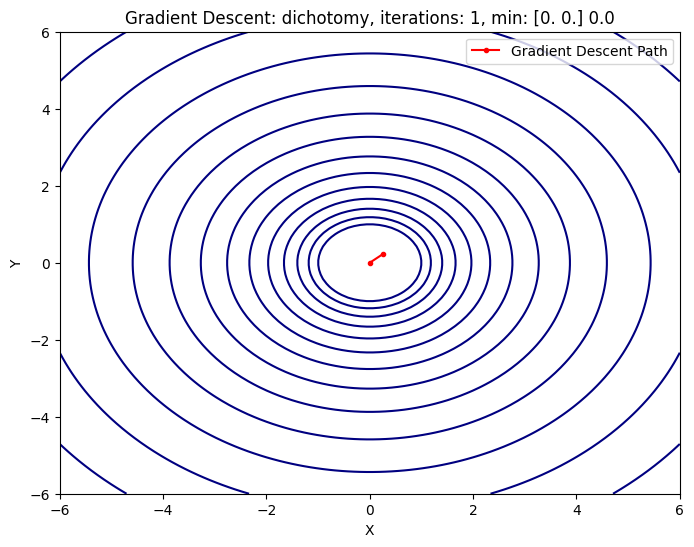

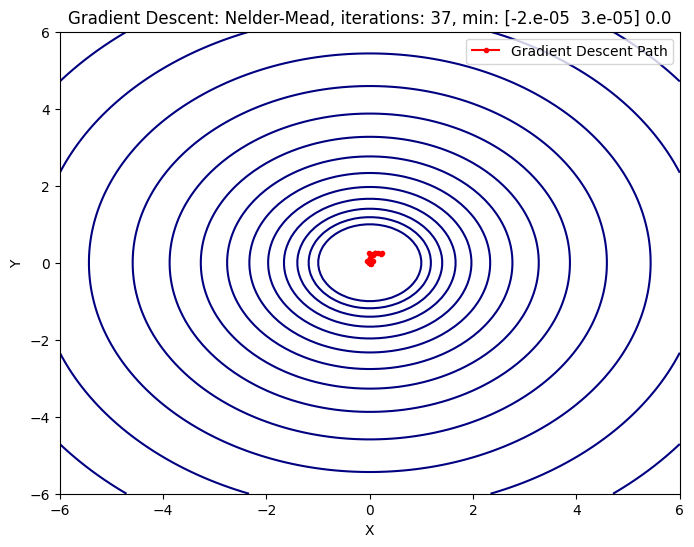

In [50]:
  analyze(f_spherical, [0.25992047, 0.22968035], 1e-3)

<ipython-input-5-d0ef7692b89e>:60: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(f.f, curr_x, method='Nelder-Mead', options={'disp': True, 'maxiter' : num_iter}, callback=callback_func)


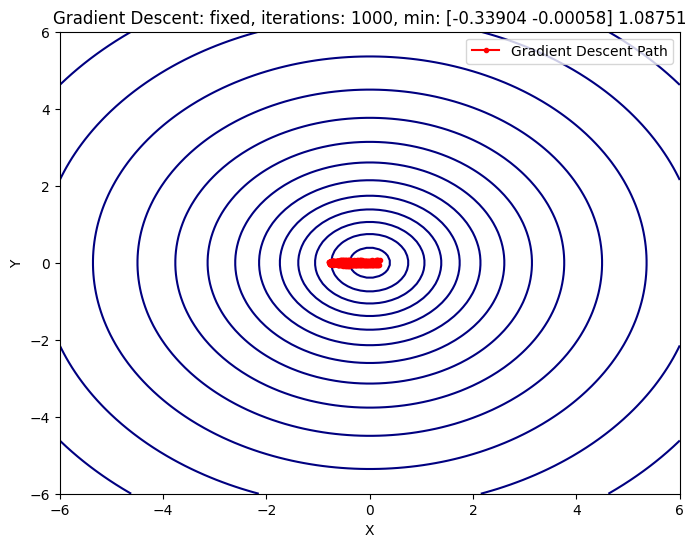

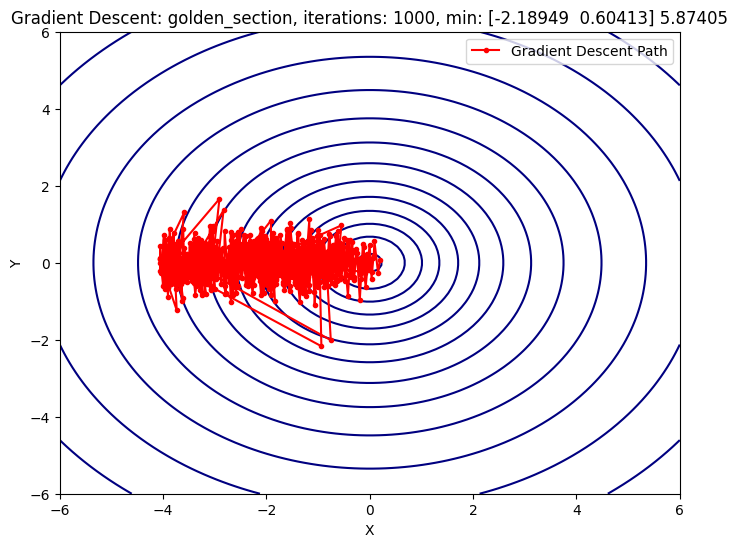

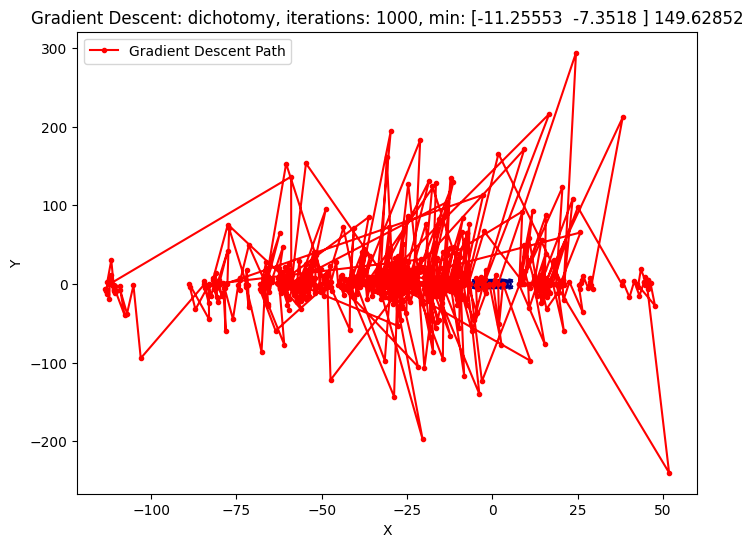

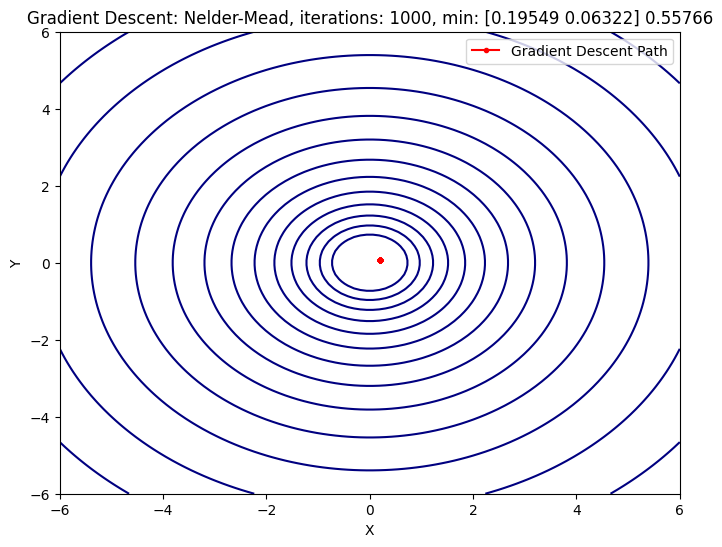

In [53]:
analyze(f_spherical_noised, [0.19307619, 0.06130238], 1e-18)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 52
         Function evaluations: 99


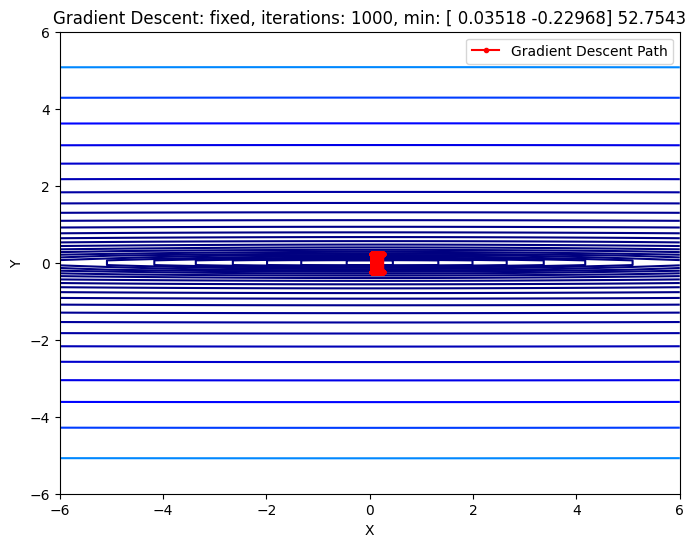

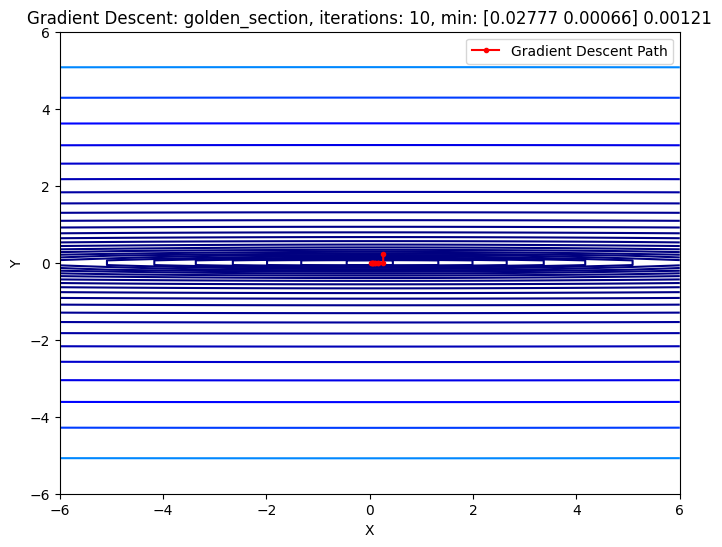

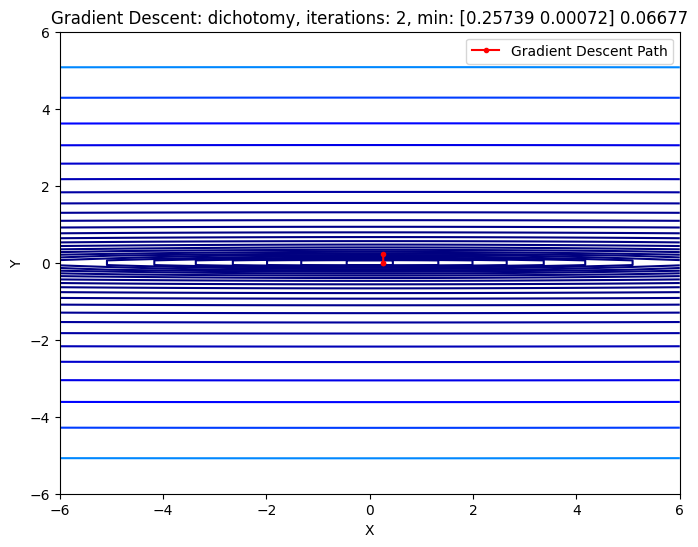

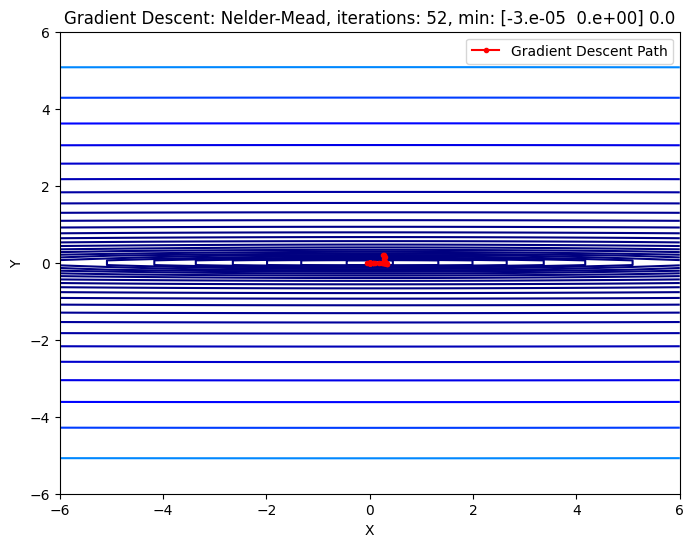

In [58]:
analyze(f_condition, [0.25992047, 0.22968035], 1e-3)